In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import sklearn
from scipy.sparse import csr_matrix
import copy


In [2]:
adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\PBMC_Hao\GSE164378_Hao\Harmony_and_ztrans\Hao_PBMC_ztrans_Harmony.h5ad")
adata.shape  # row is cells, column is gene

(161764, 33538)

In [3]:
type(adata.X)

numpy.ndarray

In [4]:
# view adata.X
rows, cols = adata.X[:5,:].nonzero()
i = 0
for row, col in zip(rows, cols):
    if i == 20: break
    print(f'Row {row}, Column {col}, Value {adata.X[row, col]}')
    i += 1


Row 0, Column 0, Value -0.0024863318540155888
Row 0, Column 2, Value -0.0035134670324623585
Row 0, Column 3, Value -0.049054428935050964
Row 0, Column 4, Value -0.01666545867919922
Row 0, Column 6, Value -0.02288634330034256
Row 0, Column 11, Value -0.010429894551634789
Row 0, Column 12, Value 3.152909755706787
Row 0, Column 13, Value -0.021930525079369545
Row 0, Column 14, Value -0.1481582671403885
Row 0, Column 15, Value -0.11470266431570053
Row 0, Column 16, Value -0.002486331621184945
Row 0, Column 17, Value -0.020627329126000404
Row 0, Column 18, Value -0.006265848875045776
Row 0, Column 19, Value -0.002486331621184945
Row 0, Column 20, Value -0.025506339967250824
Row 0, Column 21, Value -0.46497780084609985
Row 0, Column 22, Value -0.12491539120674133
Row 0, Column 23, Value -0.07090125232934952
Row 0, Column 24, Value -0.01251706201583147
Row 0, Column 25, Value -0.03329896181821823


In [5]:
# sparse CSR matrix
# num_nonzero = adata.X.getnnz(axis=1)
# num_nonzero[:10]
# dense matrix
num_nonzero = np.count_nonzero(adata.X, axis=1)  # number of nonzeros for each row
num_nonzero[:10]

array([27504, 27504, 27504, 27504, 27504, 27504, 27504, 27504, 27504,
       27504], dtype=int64)

In [6]:
# Check for columns with all zeros
all_zero_cols = np.all(adata.X == 0, axis=0)
zero_cols_count = np.sum(all_zero_cols)
print('No. of columns with all zeros:', zero_cols_count)  # 6034

# Remove columns with all zeros
adata = adata[:, ~all_zero_cols]
print('New shape of adata.X:', adata.X.shape)
print('New shape of adata.var:', adata.var.shape)

No. of columns with all zeros: 6034
New shape of adata.X: (161764, 27504)
New shape of adata.var: (27504, 2)


In [10]:
# All level 1 celltypes
adata.obs['celltype.l1'] = adata.obs['celltype.l1'].str.replace(" ", "_")
adata.obs['celltype.l2'] = adata.obs['celltype.l2'].str.replace(" ", "_")
adata.obs['celltype.l3'] = adata.obs['celltype.l3'].str.replace(" ", "_")
types = np.unique(adata.obs['celltype.l1']).tolist()
print(types)
# cell count in each celltype
adata.obs['celltype.l1'].value_counts()

C:\Users\evanlee\AppData\Local\Temp\ipykernel_20488\3394596873.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['celltype.l1'] = adata.obs['celltype.l1'].str.replace(" ", "_")


['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T']


celltype.l1
Mono       49010
CD4_T      41001
CD8_T      25469
NK         18664
B          13800
other_T     6789
DC          3589
other       3442
Name: count, dtype: int64

In [11]:
adata.obs.head()

,celltype.l1,celltype.l2,celltype.l3,Batch,donor,time,lane,Phase,nCount_ADT,nFeature_ADT,nCount_RNA,nFeature_RNA,leiden
L1_AAACCCAAGAAACTCA,Mono,CD14_Mono,CD14_Mono,Batch1,P2,7,L1,G1,7535,217,10823,2915,4
L1_AAACCCAAGACATACA,CD4_T,CD4_TCM,CD4_TCM_1,Batch1,P1,7,L1,G1,6013,209,5864,1617,2
L1_AAACCCACAACTGGTT,CD8_T,CD8_Naive,CD8_Naive,Batch1,P4,2,L1,S,6620,213,5067,1381,5
L1_AAACCCACACGTACTA,NK,NK,NK_2,Batch1,P3,7,L1,G1,3567,202,4786,1890,3
L1_AAACCCACAGCATACT,CD8_T,CD8_Naive,CD8_Naive,Batch1,P4,7,L1,G1,6402,215,6505,1621,5


## UMAP with stored embedding in Hao_PBMC_scaled_Harmony.h5ad

c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

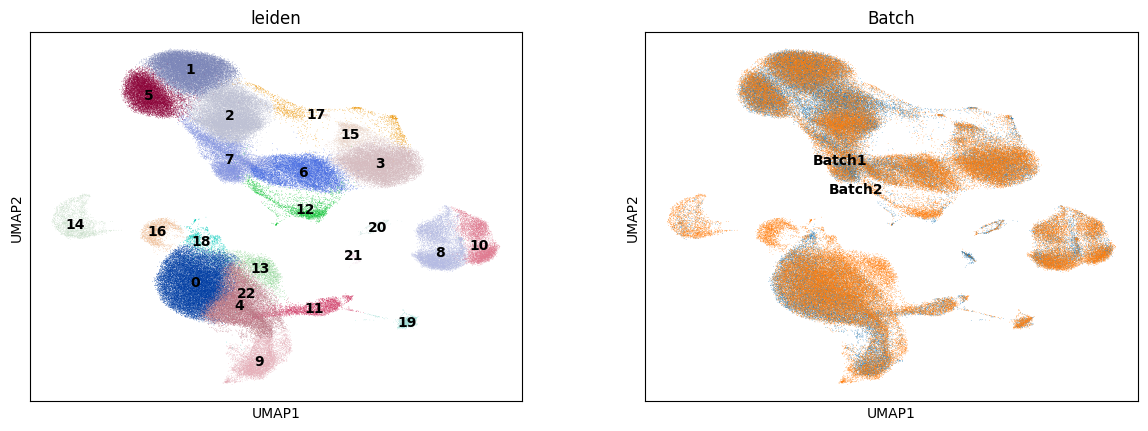

c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

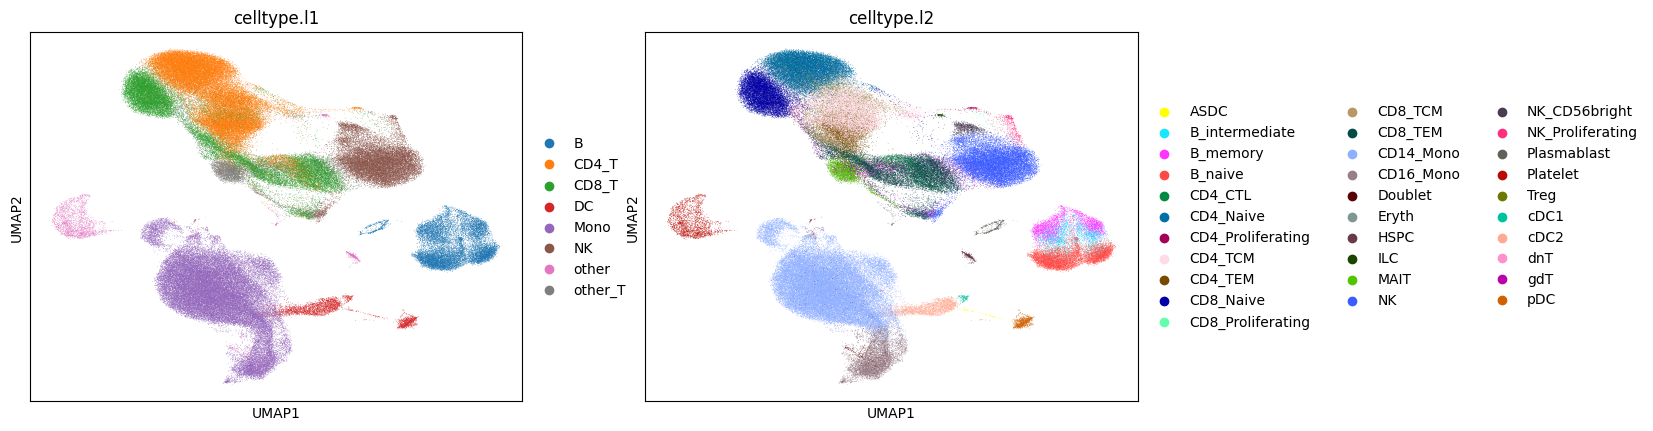

In [12]:
sc.pl.umap(adata, color=['leiden', 'Batch'], legend_loc="on data")
sc.pl.umap(adata, color=['celltype.l1', 'celltype.l2'], legend_loc="right margin")

## Representative cells
Select top clustering coefficient cells in each cell type <br>
According to the inverse relationshiop between "celltype cell count" and "Percentage" <br>
Detailed in Excel file <br>

In [13]:
umap_adja_matrix = adata.obsp['connectivities']  # derived from sc.pp.neighbors()
umap_adja_matrix

<161764x161764 sparse matrix of type '<class 'numpy.float32'>'
	with 3703680 stored elements in Compressed Sparse Row format>

In [14]:
# Clustering coefficient
import networkx as nx

G = nx.from_scipy_sparse_array(umap_adja_matrix)
print(G)

clustering_coeff = nx.clustering(G)
print(len(clustering_coeff))

Graph with 161764 nodes and 1851840 edges
161764


In [20]:
# Get the first 10 keys and values of the dictionary
first_10_items = list(clustering_coeff.items())[:10]

# Print the first 10 keys and values
for key, value in first_10_items:
    print(f"Key: {key}, Value: {value}")

# Keys are cell index, values are the corresponding clustering coefficient

Key: 0, Value: 0.14619883040935672
Key: 1, Value: 0.1323529411764706
Key: 2, Value: 0.17582417582417584
Key: 3, Value: 0.09523809523809523
Key: 4, Value: 0.11578947368421053
Key: 5, Value: 0.1830065359477124
Key: 6, Value: 0.13333333333333333
Key: 7, Value: 0.15833333333333333
Key: 8, Value: 0.14705882352941177
Key: 9, Value: 0.13333333333333333


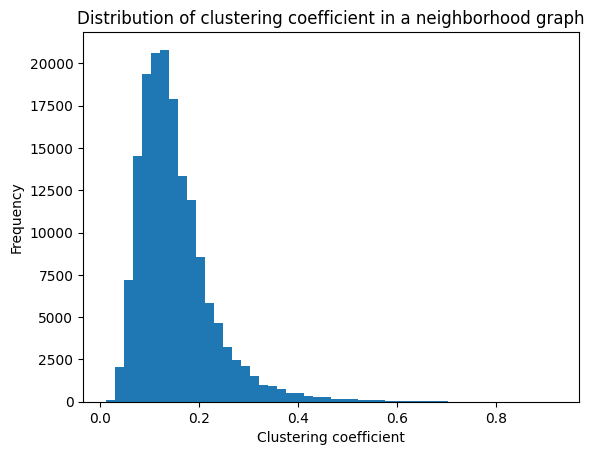

In [23]:
# Plot the distribution of clustering coefficients
import matplotlib.pyplot as plt
coefs = list(clustering_coeff.values())
plt.title('Distribution of clustering coefficient in a neighborhood graph')
plt.hist(coefs, bins=50)
plt.xlabel('Clustering coefficient')
plt.ylabel('Frequency')
plt.show()


In [25]:
# selection criteria
inv_percentage = pd.read_csv('L1_log(count)_inv_percentage.csv', index_col=0)
inv_percentage

,Original count,log10(count),Percentage,Selected count
Mono,49010,4.690285,0.200000,9802
CD4_T,41001,4.612794,0.253744,10404
CD8_T,25469,4.406012,0.397159,10116
NK,18664,4.271005,0.490795,9161
B,13800,4.139879,0.581738,8028
other_T,6789,3.831806,0.795404,5400
DC,3589,3.554973,0.987403,3544
other,3442,3.536811,1.000000,3442


In [26]:
import math
# Select top percentage clustering coefficient cells in each cell type
alltype_selected = dict()

for celltype in types:
    print('====================')
    # get percentage
    percentage = inv_percentage.loc[celltype, 'Percentage']
    print(celltype, percentage)

    # select cells from one celltype
    celltype_idx = np.where(adata.obs['celltype.l1'] == celltype)[0]
    celltype_coeff = {node_idx: clustering_coeff[node_idx] for node_idx in celltype_idx}
    
    top_count = math.ceil(len(celltype_coeff) * percentage)
    print('top count', top_count)
    top_indices = sorted(celltype_coeff, key=celltype_coeff.get, reverse=True)[:top_count]  # sort celltype_coeff by value (descending)
    # print(top_indices)
    celltype_selected = {node_idx: celltype_coeff[node_idx] for node_idx in top_indices}
    # print(celltype_selected)
    alltype_selected.update(celltype_selected)
    print(celltype, len(celltype_selected))


B 0.581737738
top count 8028
B 8028
CD4_T 0.253743917
top count 10404
CD4_T 10404
CD8_T 0.397159433
top count 10116
CD8_T 10116
DC 0.987403205
top count 3544
DC 3544
Mono 0.2
top count 9802
Mono 9802
NK 0.490794616
top count 9161
NK 9161
other 1.0
top count 3442
other 3442
other_T 0.795404155
top count 5400
other_T 5400


In [27]:
len(alltype_selected)

59897

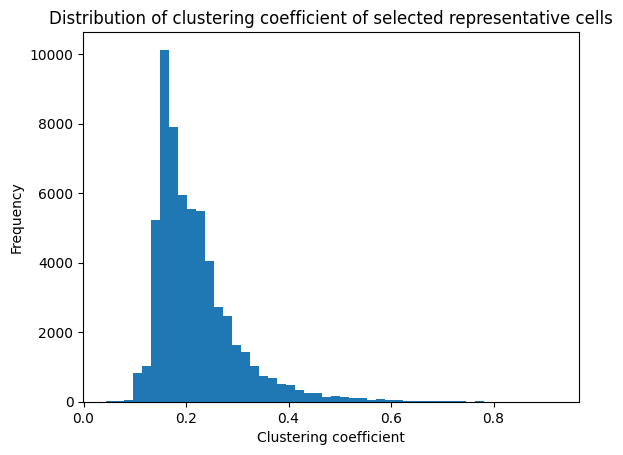

In [32]:
# Plot the distribution of clustering coefficients of selected representative cells
import matplotlib.pyplot as plt
coefs = list(alltype_selected.values())
plt.title('Distribution of clustering coefficient of selected representative cells')
plt.hist(coefs, bins=50)
plt.xlabel('Clustering coefficient')
plt.ylabel('Frequency')
plt.show()


In [37]:
# add column to adata.obs
is_representative = ['Yes' if cell in alltype_selected.keys() else 'No' for cell in clustering_coeff.keys()]
is_representative = np.array(is_representative)

# Add is_representative (Yes or No) to data.obs
adata.obs['is_representative'] = is_representative
adata.obs.head()

,celltype.l1,celltype.l2,celltype.l3,Batch,donor,time,lane,Phase,nCount_ADT,nFeature_ADT,nCount_RNA,nFeature_RNA,leiden,is_representative
L1_AAACCCAAGAAACTCA,Mono,CD14_Mono,CD14_Mono,Batch1,P2,7,L1,G1,7535,217,10823,2915,4,No
L1_AAACCCAAGACATACA,CD4_T,CD4_TCM,CD4_TCM_1,Batch1,P1,7,L1,G1,6013,209,5864,1617,2,No
L1_AAACCCACAACTGGTT,CD8_T,CD8_Naive,CD8_Naive,Batch1,P4,2,L1,S,6620,213,5067,1381,5,Yes
L1_AAACCCACACGTACTA,NK,NK,NK_2,Batch1,P3,7,L1,G1,3567,202,4786,1890,3,No
L1_AAACCCACAGCATACT,CD8_T,CD8_Naive,CD8_Naive,Batch1,P4,7,L1,G1,6402,215,6505,1621,5,No


In [38]:
sum(adata.obs['is_representative'] == 'Yes')

59897

In [41]:
# Add a column: Cluster_representative
# 在 representative cell 中，加上 cluster
clus_rep = []
for i in range(adata.shape[0]):
    if adata.obs['is_representative'][i] == 'Yes':
        # Yes_cluster_name
        clus_rep.append(adata.obs['is_representative'][i] + '_' + adata.obs['celltype.l1'][i])
    else:
        # No
        clus_rep.append(adata.obs['is_representative'][i])

adata.obs['cluster_representative'] = clus_rep

C:\Users\evanlee\AppData\Local\Temp\ipykernel_20488\2156152308.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adata.obs['is_representative'][i] == 'Yes':
C:\Users\evanlee\AppData\Local\Temp\ipykernel_20488\2156152308.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  clus_rep.append(adata.obs['is_representative'][i])
C:\Users\evanlee\AppData\Local\Temp\ipykernel_20488\2156152308.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[

In [42]:
adata.obs.head()

,celltype.l1,celltype.l2,celltype.l3,Batch,donor,time,lane,Phase,nCount_ADT,nFeature_ADT,nCount_RNA,nFeature_RNA,leiden,is_representative,cluster_representative
L1_AAACCCAAGAAACTCA,Mono,CD14_Mono,CD14_Mono,Batch1,P2,7,L1,G1,7535,217,10823,2915,4,No,No
L1_AAACCCAAGACATACA,CD4_T,CD4_TCM,CD4_TCM_1,Batch1,P1,7,L1,G1,6013,209,5864,1617,2,No,No
L1_AAACCCACAACTGGTT,CD8_T,CD8_Naive,CD8_Naive,Batch1,P4,2,L1,S,6620,213,5067,1381,5,Yes,Yes_CD8_T
L1_AAACCCACACGTACTA,NK,NK,NK_2,Batch1,P3,7,L1,G1,3567,202,4786,1890,3,No,No
L1_AAACCCACAGCATACT,CD8_T,CD8_Naive,CD8_Naive,Batch1,P4,7,L1,G1,6402,215,6505,1621,5,No,No


## Plot representative cell UMAP

In [44]:
### Get palette
# Get cell counts for each cell type
l1_cell_counts = adata.obs['celltype.l1'].value_counts()  # in value order 
l2_cell_counts = adata.obs['celltype.l2'].value_counts()

# Get colors from sc.pl.umap() plot
l1_colors = adata.uns['celltype.l1_colors']  # in celltype alphabet order
l2_colors = adata.uns['celltype.l2_colors']
# map cell type names to colors
l1_cmap = dict(zip(l1_cell_counts.index.sort_values(), l1_colors))  # in alphabet order
l2_cmap = dict(zip(l2_cell_counts.index.sort_values(), l2_colors))

c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


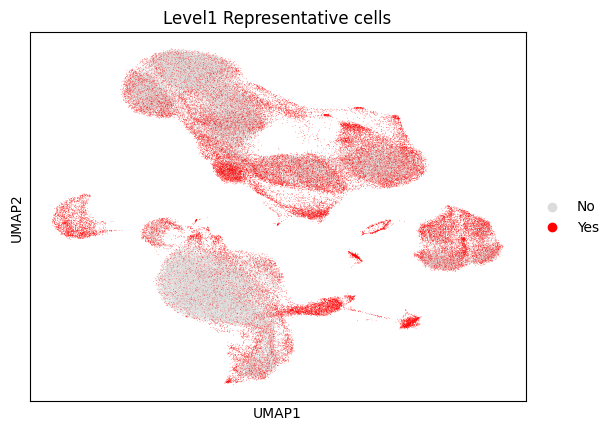

In [46]:
# Plot Yes/No representative cells
sc.pl.umap(adata, color='is_representative', title='Level1 Representative cells', palette=['#dcdcdc', 'red'])

c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


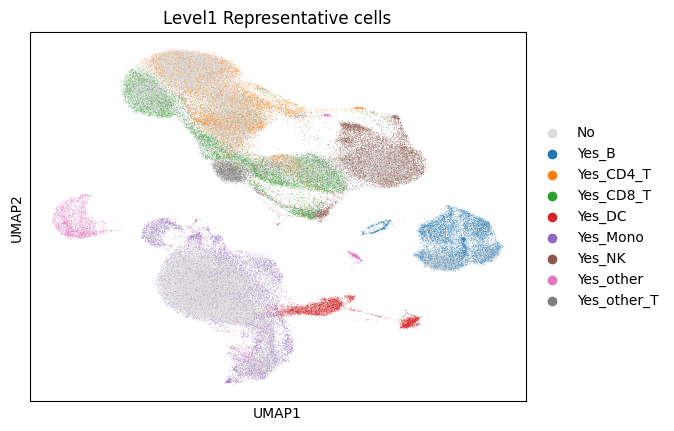

In [47]:
# Also differentiating representative cells from different cell types
sc.pl.umap(adata, color='cluster_representative', title='Level1 Representative cells', palette=['#dcdcdc']+l1_colors.tolist())

## Export representative cells adata

In [48]:
os.chdir(r"C:\Users\evanlee\Documents\Research_datasets\PBMC_Hao\GSE164378_Hao\Harmony_and_ztrans")

In [49]:
adata_rep_cells = adata[adata.obs['is_representative'] == 'Yes']
adata_rep_cells.shape

(59897, 27504)

In [50]:
adata_rep_cells.obs.head()

,celltype.l1,celltype.l2,celltype.l3,Batch,donor,time,lane,Phase,nCount_ADT,nFeature_ADT,nCount_RNA,nFeature_RNA,leiden,is_representative,cluster_representative
L1_AAACCCACAACTGGTT,CD8_T,CD8_Naive,CD8_Naive,Batch1,P4,2,L1,S,6620,213,5067,1381,5,Yes,Yes_CD8_T
L1_AAACCCACATCAGTCA,CD8_T,CD8_TEM,CD8_TEM_1,Batch1,P3,2,L1,G1,5297,212,4332,1633,6,Yes,Yes_CD8_T
L1_AAACCCACATGGATCT,B,B_intermediate,B_intermediate_lambda,Batch1,P4,2,L1,G1,8210,222,3589,1122,10,Yes,Yes_B
L1_AAACCCAGTGGAACAC,NK,NK,NK_2,Batch1,P1,2,L1,G2M,2847,201,3251,1375,3,Yes,Yes_NK
L1_AAACGAAAGTTGAATG,other_T,MAIT,MAIT,Batch1,P3,7,L1,S,3978,210,3543,1255,7,Yes,Yes_other_T


In [54]:
adata_rep_cells.write_h5ad('Hao_L1_repcells_loginv_Harmony_ztrans.h5ad')

In [55]:
np.unique(adata_rep_cells.obs['celltype.l1']).tolist()

['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T']